In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import json
import csv
from scipy.stats import linregress
from cycler import cycler

In [2]:
# Import CSV file
path = "college_data.csv"
college_data = pd.read_csv(path, encoding='utf-8')
college_data_df = pd.DataFrame(college_data)
#college_data_df.head()

In [3]:
college_df_sorted = college_data_df.sort_values(["College_names","Year"],ascending = (True))
college_df_sorted = college_df_sorted.rename(columns={'Student Size': 'Student_size'})


college_df_sorted['%_In_state_chng'] =college_df_sorted.groupby('College_names').In_state_tuition.pct_change()
college_df_sorted['%_Out_of_state_chng'] =college_df_sorted.groupby('College_names').Out_of_state_tuition.pct_change()
college_df_sorted['%_admissions_rate_chng'] =college_df_sorted.groupby('College_names').Admissions_rate_overall.pct_change()
college_df_sorted['%_Student_size_chng'] =college_df_sorted.groupby('College_names').Student_size.pct_change()

college_data_df = college_df_sorted
college_data_df[["College_names","College_state"]] = college_data_df[["College_names","College_state"]].replace(
    '"', '', regex=True)

college_df = college_df_sorted
# college_df.count()

In [4]:
# Create dataframe for each college
WSU = college_df.loc[college_df["College_names"] == 'Washington State University']
ASU = college_df.loc[college_df["College_names"] == 'Arizona State University-Tempe']
UCLA = college_df.loc[college_df["College_names"] == 'University of California-Los Angeles']
Stanford = college_df.loc[college_df["College_names"] == 'Stanford University']
UofA = college_df.loc[college_df["College_names"] == 'University of Arizona']
Berkeley = college_df.loc[college_df["College_names"] == 'University of California-Berkeley']
UCBoulder = college_df.loc[college_df["College_names"] == 'University of Colorado Boulder']
USC = college_df.loc[college_df["College_names"] == 'University of Southern California']
UW = college_df.loc[college_df["College_names"] == 'University of Washington-Seattle Campus']
OSU = college_df.loc[college_df["College_names"] == 'Oregon State University']
UofO = college_df.loc[college_df["College_names"] == 'University of Oregon']
UofU = college_df.loc[college_df["College_names"] == 'University of Utah']

# Create list of dataframes for each college
school_data = [WSU, ASU, UCLA, Stanford, UofA, Berkeley, UCBoulder, USC, UW, OSU, UofO, UofU]


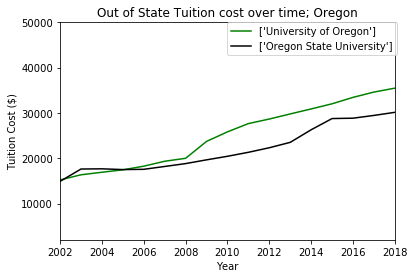


Analysis: 



In [5]:
# State of Oregon
school_data = [UofO, OSU]

fig1 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['green', 'black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(0.5, 1), loc='upper left', borderaxespad=0.)


        

plt.title("Out of State Tuition cost over time; Oregon")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show(fig1)


print("""
Analysis: 
"""
)

# fig1.savefig('state_tuition/OREGON_IN.png')

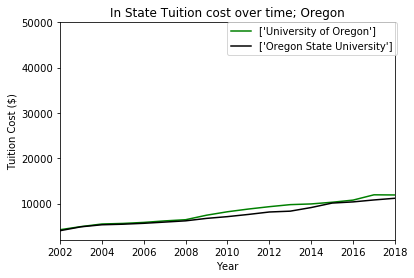


Analysis: 



In [6]:
# State of Oregon
school_data = [UofO, OSU]
fig2 = plt.figure()
colors = ['green','orange']
for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['green', 'black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0.)

plt.title("In State Tuition cost over time; Oregon")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig2.savefig('state_tuition/OREGON_OUT.png')

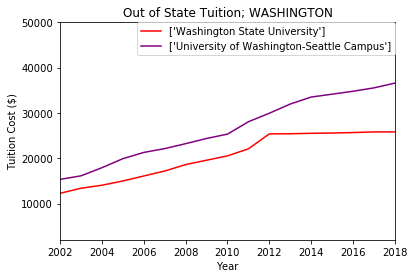


Analysis: 



In [7]:
# State of Washington
school_data = [WSU, UW]
fig3 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'purple'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.23, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of State Tuition; WASHINGTON")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig3.savefig('state_tuition/WASHINGTON_OUT.png')

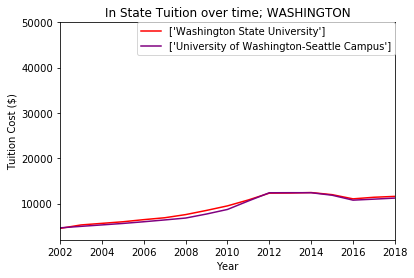


Analysis: 



In [8]:
# State of Washington
school_data = [WSU, UW]
fig4 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'purple'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.23, 1), loc='upper left', borderaxespad=0.)

plt.title("In State Tuition over time; WASHINGTON")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig4.savefig('state_tuition/WASHINGTON_IN.png')

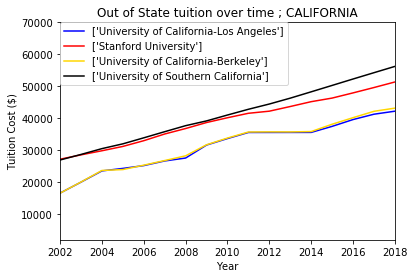


Analysis: 



In [9]:
# State of California
school_data = [UCLA, Stanford, Berkeley, USC]
fig5 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['blue', 'red', 'gold', 'black'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of State tuition over time ; CALIFORNIA")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,70000)
plt.show()


print("""
Analysis: 
"""
)

# fig5.savefig('state_tuition/CALIFORNIA_OUT.png')

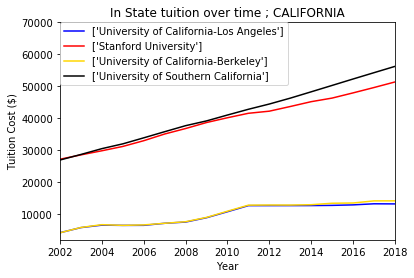


Analysis: 



In [10]:
# State of California
school_data = [UCLA, Stanford, Berkeley, USC]
fig6 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['blue', 'red', 'gold', 'black'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.)

plt.title("In State tuition over time ; CALIFORNIA")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,70000)
plt.show()


print("""
Analysis: 
"""
)

# fig6.savefig('state_tuition/CALIFORNIA_IN.png')

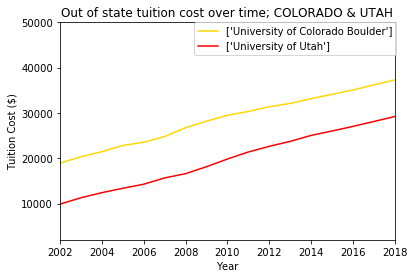


Analysis: 



In [11]:
# State of Colorado and Utah
school_data = [UCBoulder,UofU]
fig7 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.4, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of state tuition cost over time; COLORADO & UTAH")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig7.savefig('state_tuition/COLORADO_UTAH_OUT.png')

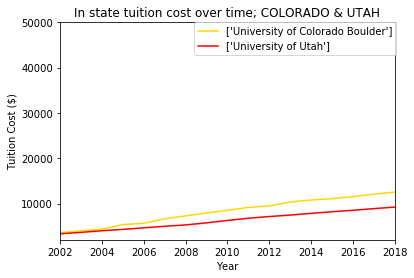


Analysis: 



In [12]:
# State of Colorado and Utah
school_data = [UCBoulder,UofU]
fig8 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))        
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.4, 1), loc='upper left', borderaxespad=0.)

plt.title("In state tuition cost over time; COLORADO & UTAH")
plt.xlabel("Year")
plt.ylabel("Tuition Cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig8.savefig('state_tuition/COLORADO_UTAH_IN.png')

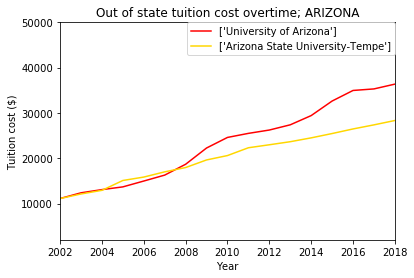


Analysis: 



In [13]:
# State of Arizona 
school_data = [UofA, ASU]
fig9 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['Out_of_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'gold'])))  
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.38, 1), loc='upper left', borderaxespad=0.)

plt.title("Out of state tuition cost overtime; ARIZONA")
plt.xlabel("Year")
plt.ylabel("Tuition cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig9.savefig('state_tuition/ARIZONA_OUT.png')

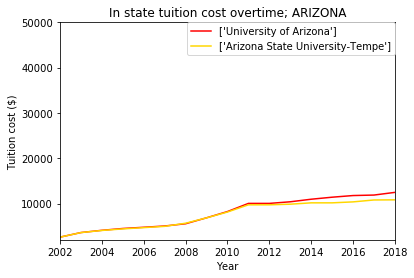


Analysis: 



In [14]:
# State of Arizona 
school_data = [UofA, ASU]
fig10 = plt.figure()

for school in school_data:
        x_values = school['Year']
        y_values = school['In_state_tuition']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'gold']))) 
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.38, 1), loc='upper left', borderaxespad=0.)

plt.title("In state tuition cost overtime; ARIZONA")
plt.xlabel("Year")
plt.ylabel("Tuition cost ($)")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
plt.show()


print("""
Analysis: 
"""
)

# fig10.savefig('state_tuition/ARIZONA_IN.png')

In [15]:
#START ERINS GRAPHS

In [16]:
# read in csv, print dataframe
app_adm_df = pd.read_csv("clean_app_data.csv", encoding="utf-8")
# app_adm_df

In [17]:
#create column for admissions vs applications
app_adm_df['admissions_vs_applications'] = app_adm_df['applicants_total'] - app_adm_df['admissions_total']

In [18]:
WSU = app_adm_df.loc[app_adm_df["College_names"] == 'Washington State University']
ASU = app_adm_df.loc[app_adm_df["College_names"] == 'Arizona State University-Tempe']
UCLA = app_adm_df.loc[app_adm_df["College_names"] == 'University of California-Los Angeles']
Stanford = app_adm_df.loc[app_adm_df["College_names"] == 'Stanford University']
UofA = app_adm_df.loc[app_adm_df["College_names"] == 'University of Arizona']
Berkeley = app_adm_df.loc[app_adm_df["College_names"] == 'University of California-Berkeley']
UCBoulder = app_adm_df.loc[app_adm_df["College_names"] == 'University of Colorado Boulder']
USC = app_adm_df.loc[app_adm_df["College_names"] == 'University of Southern California']
UW = app_adm_df.loc[app_adm_df["College_names"] == 'University of Washington-Seattle Campus']
OSU = app_adm_df.loc[app_adm_df["College_names"] == 'Oregon State University']
UofO = app_adm_df.loc[app_adm_df["College_names"] == 'University of Oregon']
UofU = app_adm_df.loc[app_adm_df["College_names"] == 'University of Utah']
school_data = [WSU, ASU, UCLA, Stanford, UofA, Berkeley, UCBoulder, USC, UW, OSU, UofO, UofU]

In [19]:
#Begin Total Applicants Graphs

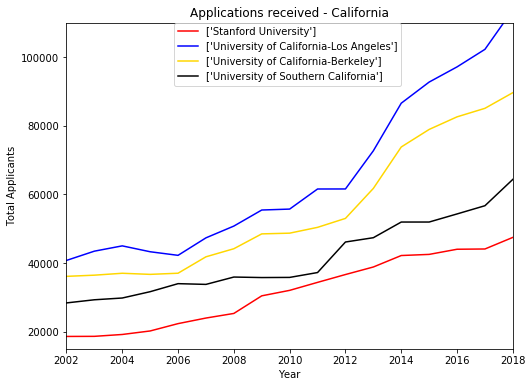

In [20]:
school_data = Stanford, UCLA, Berkeley, USC
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'blue', 'gold','black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.75, 1), loc='best', borderaxespad=0.)
plt.title("Applications received - California")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(15000,110000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/applicants_CA.png")

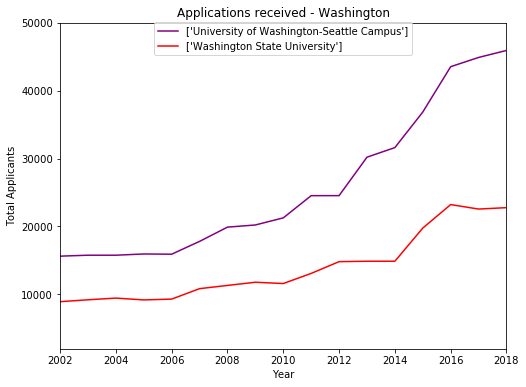

In [21]:
school_data = UW, WSU
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['purple', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Washington")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/applicants_WA.png")

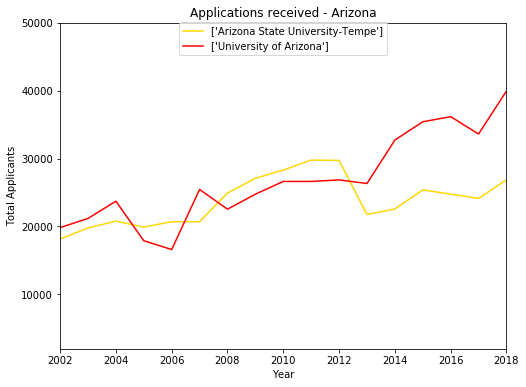

In [22]:
school_data = ASU, UofA
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Arizona")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/applicants_AZ.png")

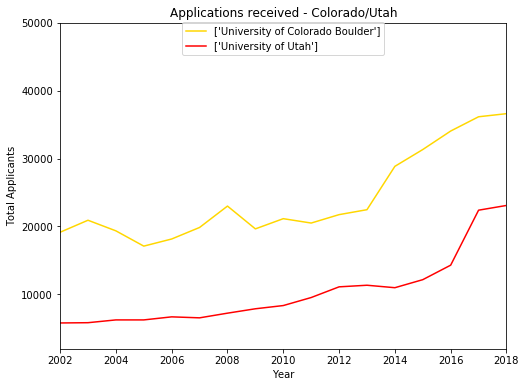

In [23]:
school_data = UCBoulder, UofU
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Colorado/Utah")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/applicants_CO_UT.png")

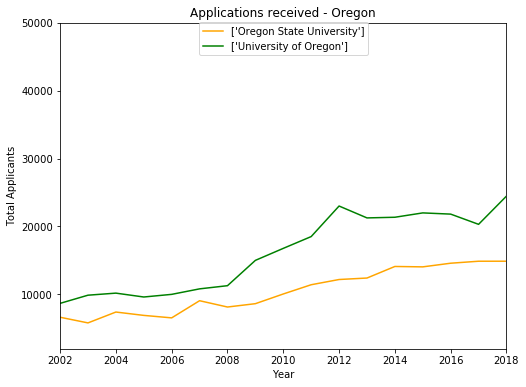

In [24]:
school_data = OSU, UofO
for school in school_data:
        x_values = school['Year']
        y_values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['orange', 'green'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Applications received - Oregon")
plt.xlabel("Year")
plt.ylabel("Total Applicants")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/applicants_OR.png")

In [25]:
#Begin Total Admissions Graphs

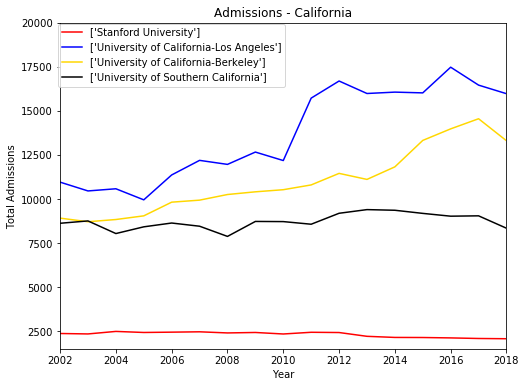

In [26]:
school_data = Stanford, UCLA, Berkeley, USC
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['red', 'blue', 'gold','black'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.25, .90), loc='center', borderaxespad=0.)
plt.title("Admissions - California")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(1500,20000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/admissions_CA.png")

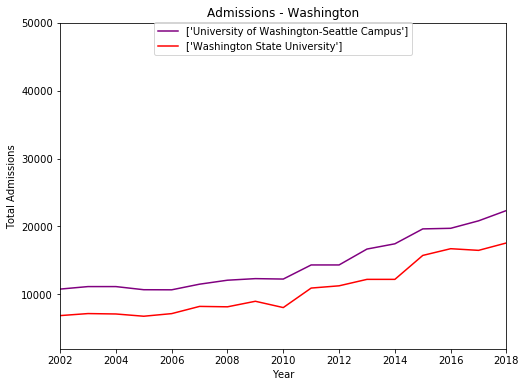

In [27]:
school_data = UW, WSU
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        _values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['purple', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Washington")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/admissions_WA.png")

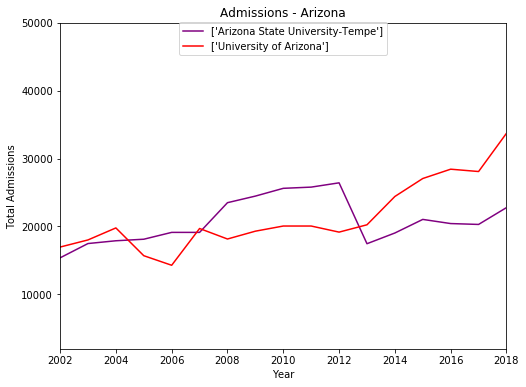

In [28]:
school_data = ASU, UofA
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Arizona")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/admissions_AZ.png")

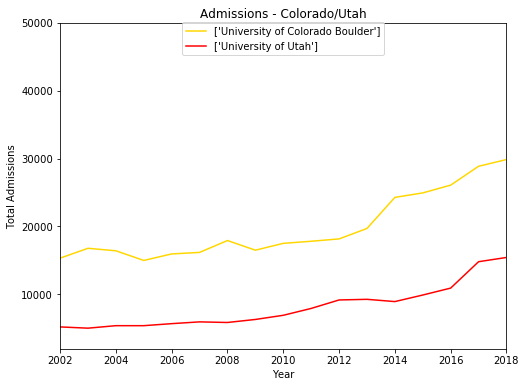

In [29]:
school_data = UCBoulder, UofU
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        _values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['gold', 'red'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Colorado/Utah")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/admissions_CO_UT.png")

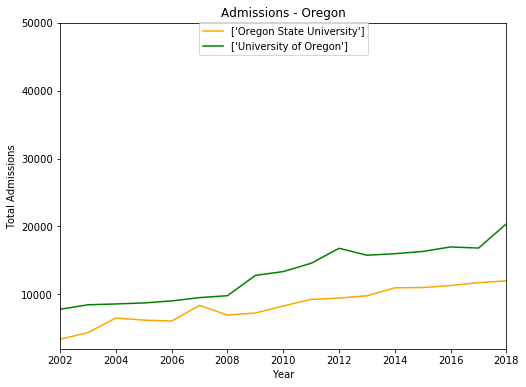

In [30]:
school_data = OSU, UofO
for school in school_data:
        x_values = school['Year']
        y_values = school['admissions_total']
        _values = school['applicants_total']
        plt.rc('axes', prop_cycle=(cycler('color', ['orange', 'green'])))
        plt.plot(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(.5, .95), loc='center', borderaxespad=0.)
plt.title("Admissions - Oregon")
plt.xlabel("Year")
plt.ylabel("Total Admissions")
plt.xlim(min(x_values),max(x_values))
plt.ylim(2000,50000)
fig = plt.gcf()
fig.set_size_inches(8,6)
# plt.savefig("images/admissions_OR.png")

In [31]:
#START PHOEBES GRAPH

In [32]:
# for school in school_data:
#         x_values = school['Admissions_rate_overall']
#         y_values = school['Out_of_state_tuition']
#         plt.scatter(x_values, y_values, label=school['College_names'].unique())
        
# plt.title("Admissions Rate vs Out of State Tuition")
# plt.xlabel("admissions rate overall")
# plt.ylabel("out of state tuition cost")
# plt.xlim(min(x_values),max(x_values))
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# plt.plot(x_values,regress_values,"r-")
# plt.show()
# print(f"The correlation coefficient is: {rvalue}")
# print(f"The slope of the best fit line is: {slope}")
app_adm_df = college_df.merge(app_adm_df, on="College_names", how="left", left_index=True, right_index=True)
app_adm_df
WSU = app_adm_df.loc[app_adm_df["College_names"] == 'Washington State University']
ASU = app_adm_df.loc[app_adm_df["College_names"] == 'Arizona State University-Tempe']
UCLA = app_adm_df.loc[app_adm_df["College_names"] == 'University of California-Los Angeles']
Stanford = app_adm_df.loc[app_adm_df["College_names"] == 'Stanford University']
UofA = app_adm_df.loc[app_adm_df["College_names"] == 'University of Arizona']
Berkeley = app_adm_df.loc[app_adm_df["College_names"] == 'University of California-Berkeley']
UCBoulder = app_adm_df.loc[app_adm_df["College_names"] == 'University of Colorado Boulder']
USC = app_adm_df.loc[app_adm_df["College_names"] == 'University of Southern California']
UW = app_adm_df.loc[app_adm_df["College_names"] == 'University of Washington-Seattle Campus']
OSU = app_adm_df.loc[app_adm_df["College_names"] == 'Oregon State University']
UofO = app_adm_df.loc[app_adm_df["College_names"] == 'University of Oregon']
UofU = app_adm_df.loc[app_adm_df["College_names"] == 'University of Utah']
school_data = [WSU, ASU, UCLA, Stanford, UofA, Berkeley, UCBoulder, USC, UW, OSU, UofO, UofU]

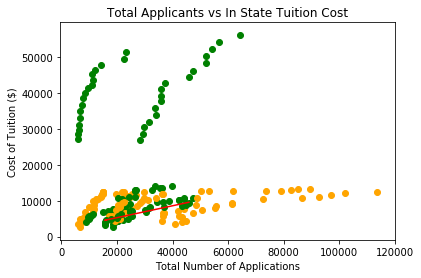

The correlation coefficient is: 0.9403982447623424
The slope of the best fit line is: 0.1657413416627404


In [33]:
fig_p1 = plt.figure()
for school in school_data:
        x_values = school['applicants_total']
        y_values = school['In_state_tuition']
        plt.scatter(x_values, y_values, label=school['College_names'].unique())
        
plt.title("Total Applicants vs In State Tuition Cost")
plt.xlabel("Total Number of Applications")
plt.ylabel("Cost of Tuition ($)")
# plt.xlim(min(x_values),max(x_values))
# plt.ylim(0,30000)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The correlation coefficient is: {rvalue}")
print(f"The slope of the best fit line is: {slope}")
# fig_p1.savefig("Phoebes_images/TTL_apps_vs_tuition_IN.png")

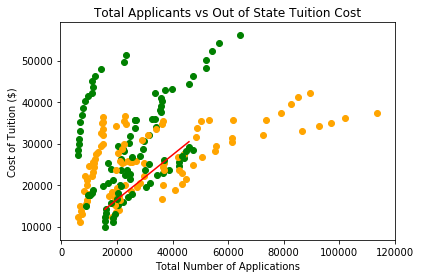

The correlation coefficient is: 0.9361586909161127
The slope of the best fit line is: 0.5377624596025342


In [35]:
fig_p2 = plt.figure()
for school in school_data:
        x_values = school['applicants_total']
        y_values = school['Out_of_state_tuition']
        plt.scatter(x_values, y_values, label=school['College_names'].unique())
        
plt.title("Total Applicants vs Out of State Tuition Cost")
plt.xlabel("Total Number of Applications")
plt.ylabel("Cost of Tuition ($)")
# plt.xlim(min(x_values)-20000,max(x_values)+20000)
# plt.ylim(min(y_values)-10000,max(y_values)+30000)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The correlation coefficient is: {rvalue}")
print(f"The slope of the best fit line is: {slope}")
fig_p2.savefig("Phoebes_images/TTL_apps_vs_tuition_OUT.png")